
LECTURE 1 --> INTRODUCTION

LECTURE 2 --> INTRO TO LLMs

LECTURE 3 --> STAGE OF BUILDING LLMs

LECTURE 4 --> BASIC INTRO TO TRANSFORMERS

LECTURE 5 --> A CLOSER LOOK AT GPT (GENERATIVE PRETRAINED TRANSFORMERS)

LECTURE 6 --> STAGES OF BUILDING LLM

LECTURE 7 --> TOKENIZATION

        REFER TO NOTES

Step 1: Creating Tokens

Reading in a short story as text sample into Python

In [110]:
# open and reading txt file with encoding specification
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

print(f"Total number of characters: {len(raw_text)}")
print(raw_text[:99])

Total number of characters: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [111]:
import re
# splitting on comma and dots and other special characters -> LEARN ABOUT THE CORRECT USAGE OF METHODS AND BUILT IN FUNCTION
text_split = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
# splitting on all the characters that are mentioned in the square brackets, \s stands for white spaces, mind the syntax
print(len(text_split))
print(text_split[:30])

9235
['I', ' ', 'HAD', ' ', 'always', ' ', 'thought', ' ', 'Jack', ' ', 'Gisburn', ' ', 'rather', ' ', 'a', ' ', 'cheap', ' ', 'genius', '--', 'though', ' ', 'a', ' ', 'good', ' ', 'fellow', ' ', 'enough', '--']


In [112]:
# removing whitespaces, not always to be removed depending on the application
# iterating over the list with white spaces, if item strip = True preprocessed-list.append word 
# if evaluated as False nothing is appended
preprocessed = []
for item in text_split: 
    if item.strip():
        preprocessed.append(item.strip())
print(len(preprocessed))
print(preprocessed)

4690
['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '"', 'The', 'height', 'of', 'his', 'glory', '"', '--', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '--', 'his', 'last', 'Chicago', 'sitter', '--', 'deploring', 'his', 'unaccountable', 'abdication', '.', '"', 'Of', 'course', 'it', "'", 's', 'going', 'to', 'send', 'the', 'value', 'of', 'my', 'picture', "'", 'way', 'up', ';', 'but', 'I', 'don', "'", 't', 'think', 'of', 'that

Step 2: Assigning Token IDs

In [113]:
# create vocabulary in alphabetical order
all_tokens = sorted(set(preprocessed))
vocab_size = len(all_tokens)

print(vocab_size)

1130


In [114]:
# creating dictionary with token as key and ID as value
# assigning token id to each token
vocab = {}
for integer, token in enumerate(all_tokens):
    vocab[token] = integer
# iterating through dictionary enumerating key-value pairs
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break
print(vocab)

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)
{'!': 0, '"': 1, "'": 2, '(': 3, ')': 4, ',': 5, '--': 6, '.': 7, ':': 8, ';': 9, '?': 10, 'A': 11, 'Ah': 12, 'Among': 13, 'And': 14, 'Are': 15, 'Arrt': 16, 'As': 17, 'At': 18, 'Be': 19, 'Begin': 20, 'Burlington': 21, 'But': 22, 'By': 23, 'Carlo': 24, 'Chicago': 25, 'Claude': 26, 'Come': 27, 'Croft': 28, 'Destroyed': 29, 'Devonshire': 30, 

In [115]:
# creating Tokenizer class that handles encodng (assign ids to token)
# and decoding (assigning tokens based on ids)
# word based tokenizer
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab # key=token and value=token_id
        self.int_to_str = {
            token_id:token for token, token_id in vocab.items()
        }   # key=token_id and value=token
    
    def encode(self, text):
        preprocessed_text = re.split(r'([.,:;?_!"()\']|--|\s)', text)

        preprocessed_list = []
        for item in preprocessed_text:
            if item.strip():
                preprocessed_list.append(item.strip())
    
        ids = []
        for word in preprocessed_list:
            ids.append(self.str_to_int[word])
        return ids
    
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # replace spaces before special characters
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [116]:
# apply SimpleTokenizerClass to text
tokenizer1 = SimpleTokenizerV1(vocab)
text = """It's the last he painted, you know,"
          Mrs. Gisburn said with pardonable pride."""
ids = tokenizer1.encode(text)
print(ids)

[56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [117]:
tokenizer1.decode(ids)

'It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

In [118]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab_ext = {}
for token_id, token in enumerate(all_tokens):
    vocab_ext[token] = token_id
len(vocab_ext.items())

1132

In [119]:
for key, val in enumerate(list(vocab_ext.items())[-5:]):
    print(val)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [120]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {
            token_id:token for token, token_id in vocab.items()
        }
    
    def encode(self, text):
        preprocessed = re.split(r'([.,:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]
        
        ids = [self.str_to_int[token] for token in preprocessed]
        return ids
    
    def decode(self, ids):
        text = " ".join([self.int_to_str[token_id] for token_id in ids])
        text = re.sub(r'\s+([,.;:?!"()\'])', r'\1', text)
        return text

In [121]:
tokenizer = SimpleTokenizerV2(vocab_ext)
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [122]:
tokenizer.encode(text)

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]

In [123]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

LECTURE 8 --> BYTE PAIR ENCODING (SUB WORD TOKENIZATION)

! pip install tikoken

In [124]:
# Byte-Pair-Encoding (algorithm to compress data)

# CAPTURES COMMON MEANING BETWEEN SIMILAR WORDS BY TAKING ROOT OR SUFFIX AS ONE TOKEN 

# Rule 1 common words that apear in the dataset are not to be split
# Rule 2 rare words that appear in the dataset are to be split into subwords

# sub word tokenization also helps the model learn about the relation between similar meaning of related words

# -> here the most common pairs can be used and added to the dictionary 
# to determine when enough similar pairs have been found is either the size of the vocabulary as 
# decisive aspect or the number of iterations ino order to find byte-pairs goiing through the respective training data in the preprocessing step

# for the training of gpt-2 the byte pair encoder was used based on the sub-word-tokenization

# word based tokenizer uses a large dictionary because each word has to be in there as a whole, also does capture similarity between related words
# character based tokenizer uses just single characters in the vocabulary, here the size of the vocabulary is considerably smaller 
# but also there is no capture of the relation between similar words, also it uses a lot computation to create words out of single characters
import importlib
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")

byte pair encoding: take the vabulary dictionary and split the words in their characters -> count the each character a for it's appearance -> find the most common byte pair which occurs the most -> replace it with a new byte pair that does not yet exist in the vocabulary -> merge the byte pair that occurs the most and use it as a new character -> depending on how often each character was used subtract that amount from the amount of the separate characters before the merge 

this iteration can be repeated multiple times until a certain number of iterations is reached or if a certain number of tokens has been reached 

In [125]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces " \
    "of someunknownPlace."
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 286, 617, 34680, 27271, 13]


In [126]:
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace.


In [127]:
integers = tokenizer.encode("Akwirw ier")
print(integers)

strings = tokenizer.decode(integers)
print(strings)


[33901, 86, 343, 86, 220, 959]
Akwirw ier


"Akwirw ier" -> decoding schema of this expression
Token0  ->   Ak    Token0_id  ->  33901
Token1  ->   w     Token1_id  ->  86
Token2  ->   ir    Token2_id  ->  343
Token3  ->   w     Token3_id  ->  86
Token4  ->   " "   Token4_id  ->  220
Token5  ->   ier   Token5_id  ->  959

In [128]:
import tiktoken

# initialize the encodings for gpt2, gpt3 and gpt4
encodings = {
    "gpt2": tiktoken.get_encoding("gpt2"),
    "gpt3": tiktoken.get_encoding("p50k_base"), # commonly associated with gpt-3 models
    "gpt4": tiktoken.get_encoding("cl100k_base") # used for gpt-4 and later versions
}

# get the vocabulary size for each encoding
vocab_sizes = {}
for model, encoding in encodings.items():
    vocab_sizes[model] = encoding.n_vocab

for model, size in vocab_sizes.items():
    print(f"The vocabulary size for {model.upper()} is: {size}")

The vocabulary size for GPT2 is: 50257
The vocabulary size for GPT3 is: 50281
The vocabulary size for GPT4 is: 100277


LECTURE 9 --> CREATING INPUT TARGET-PAIRS

In [129]:
# Creating Input-Target-Pairs
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

    enc_text = tokenizer.encode(raw_text)
    print(len(enc_text))

5145


In [130]:
enc_sample = enc_text[50:]

In [131]:
# Creating Input-Output-Target Pairs using two Variables x and y
context_size = 4

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


In [132]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [133]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


Implementing a Data Loader

    Step 1: Tokenize the entire text

    Step 2: Use a sliding window to chunk the boo into the overlapping sequences of max_length

    Step 3: Return the total number of rows in the dataset

    Step 4: Return a single row from the datset

In [134]:
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        # stride moves the input field by its value
        for i in range (0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
    
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

    Step 1: Initialize the tokenizer

    Step 2: Create Dataset

    Step 3: drop_last=True drops the last batch if it is shorter then the specified batch_size to prevent loss spikes during training

    Step 4: The number of CPU processes to use for preprocessing

In [135]:
import tiktoken
def create_dataloader_v1(txt, batch_size=4, max_length=256, stride=128, shuffle=True, drop_last=True, num_workers=0):

    # Initialize tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    # returns the input-output pairs based on what is mentioned in the __getitem__ method in the Dataset Class
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size, # how many input-output pairs are processed at a time, input output pairs will be update after the entire batch bis processed
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [136]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [137]:
print("PyTorch version:", torch.__version__)
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

PyTorch version: 2.2.0
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [138]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


stride = context_length avoids overlapping and prevents overfitting
batch_size = number of rows

Note for understanding : change the values of the Parameters to see the behavior and how the tensors change

In [139]:
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Input:\n", inputs)
print("\nTargets:\n", targets)

Input:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


LECTURE 10 --> WHAT ARE TOKEN EMBEDDINGS

Token Embeddings - Vector Embeddings

- Vectors can capture semantic meaning
- Similar words have similar vectors
- Neural Networks can be trained in order to Create Vector Embeddings

In [140]:
# ! pip install gensim

In [141]:
import gensim.downloader as api
model = api.load("word2vec-google-news-300")

In [142]:
word_vectors=model

# printing the vector embedding of a word
print(word_vectors['computer']) # accessing the vector for the word computer

[ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01 -4.46777344e-02  1.88476562e-01
  5.51757812e-02  5.02929

In [143]:
print(word_vectors['cat'].shape)

(300,)


Similar Words - King + Woman - Man = ?

In [144]:
# Example of using most similar
# print(word_vectors.most_similar(positive=['king', 'woman'], negative=['man'], topn=10))

In [145]:
# Example of calculating similarity
# the higher the similarity score the closer the vectors of the respective words are together
print(word_vectors.similarity('woman', 'man'))
print(word_vectors.similarity('king', 'queen'))
print(word_vectors.similarity('uncle', 'aunt'))
print(word_vectors.similarity('boy', 'girl'))
print(word_vectors.similarity('nephew', 'niece'))
print(word_vectors.similarity('paper', 'water'))

0.76640123
0.6510956
0.7643474
0.8543272
0.7594367
0.11408083


In [146]:
# most similar words

print(word_vectors.most_similar('tower', topn=5))

[('towers', 0.8531749844551086), ('skyscraper', 0.6417424082756042), ('Tower', 0.639177143573761), ('spire', 0.5946877598762512), ('responded_Understood_Atlasjet', 0.5931612849235535)]


In [147]:
import numpy as np

# Words to compare
word1 = 'man'
word2 = 'woman'

word3 = 'nephew'
word4 = 'niece'

word5 = 'semiconductor'
word6 = 'earthworm'

# Calculate the vector difference
vector_difference1 = model[word1] - model[word2]
vector_difference2 = model[word3] - model[word4]
vector_difference3 = model[word5] - model[word6]

# Calculate the magnitude of vector difference
magnitude_of_difference1 = np.linalg.norm(vector_difference1)
magnitude_of_difference2 = np.linalg.norm(vector_difference2)
magnitude_of_difference3 = np.linalg.norm(vector_difference3)

# Print the magnitude odf difference
print("The magnitude of difference between '{}' and '{}' is {:.2f}".format(word1, word2, magnitude_of_difference1))
print("The magnitude of difference between '{}' and '{}' is {:.2f}".format(word3, word4, magnitude_of_difference2))
print("The magnitude of difference between '{}' and '{}' is {:.2f}".format(word5, word6, magnitude_of_difference3))


The magnitude of difference between 'man' and 'woman' is 1.73
The magnitude of difference between 'nephew' and 'niece' is 1.96
The magnitude of difference between 'semiconductor' and 'earthworm' is 5.67


Embedding Layer Weight Matrix - for gpt-2 has 50257 tokens(rows(size of the vocabulary)) and 768 values(colums(dimension of the vector))
In the beginning the values were not known and assigned randomly
Based on the training data that was given to the model the values were determined in relative relation to each other (back propagation)

In [148]:
# Creating Token Embeddings
input_ids = torch.tensor([2, 3, 5, 1])

In [149]:
vocab_size = 6
output_dim = 3
# size of embedding layer weight matrix = 6 x 3, output_dim represents the dimension of vectors

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
# torch.nn.Embedding is creating the embedding layer weight matrix by assigning random values 

VECTOR EMBEDDINGS EXPLOID THE SEMANTIC MEANING OF A WORD - Also needed is the contextual meaning if the word refers to another word which might be related but come much earlier in the text 

In [150]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


Embedding Layer is look-up Matrix which you can pass a single id or multiple ids in order to retrieve the vector or token embeddings (look-up operation that retrieves the vector embedding for a given token id)

In [151]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [152]:
# based on the numbers that were given in cell 128 in finds the respective rows
# miding that 2 finds row 3 because the count of the row starts with 0
# alternative to the embedding layer the inear layer can be used - similar to a linear neural network
# when using 3 token ids these are converted into one hot representation (only 0 and 1) - called one hot encoding
# vocab size determines the number of iembedding layer is more efficient - avoids multiplication with zero
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


LECTURE 11 --> POSITIONAL EMBEDDING

token embeddings as well as positional embeddings are optimized during trainINg as they are not known beforehand and assumed randomly at the start of training process

With just vector embedding there is no information about the position of a word in a sentence
same token id results in the same embedding vector 

two types of positional embedding ABSOLUTE and RELATIVE

-> in absolute positional embedding position of a word in a sentence in taken under consideration
to each token embedding a positional embedding is added (describes the position)
-> in relative positional embedding instaed of the position of the tokens it rather concentrates of how far the tokens are apart from each other in the text, model can generalize better to sequence of varying lengths, better for analyzing longer sequences

ABSOLUTE: Suitable when fixed order of tokens is crucial, such as sequencs generation

RELATIVE: Suitable for tasks like language modeling over long sequences, where the same phrase can appear in different parts of the sequence

In [153]:
# Positional Embeddings (Encoding Word Positions)

vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [154]:
max_length = 4 # is the context_size of 4 tokens per row with a stride of 4 (sliding window moves 4 tokens)
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length, stride=max_length, shuffle=False
)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [155]:
# 8 text samples consisting of 4 tokens each, since the max_length is equal to the stride there is no overlapping of the tokens in the samples
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


each value in the Matrix represents one token from the text starting at the beginning
to each token a 256 dimensional vector is assigned (vector embedding) -> 8 x 4 x 256 Matrix

In [156]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [157]:
# the matrix which is created in this step contains random values at this stage
# context length is 4 which is why 4 positional vectors are needed 1 for each of the 4 positions, the dimension will also be 256 as the vectors for token embedding an dpositional embedding need to be added in order to get the input enbedding
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

the number of positional vector that are needed is determined by the context length, if four tokens are considered at a time the there are 4 positional vectors needed in order to describe each and everyone of the four positions

In [158]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


for each token in the context length there is a unique token id -> in order to exploid the semantic meaning of each token there is a token embedding with a specified number of dimensions assigned -> the values of the dimensions are chosen randomly in the beginning and change during the training of the model -> in order to exploid the positional meaning of each token in addition to the token embedding there is a positional embedding created, the positional embedding exploids the position of the token within the context_length -> if the context length is 4 then there are four positional embeddings needed -> then the token embeddings are added to the positional embeddings and the matrix that is created upon doing so is used for the training of the model

the values in the token embedding layer as well as the values in the positional embedding layer have to be optimized during training using large amounts of training data in the form of text

In [159]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


LECTURE 12 --> LLM DATA PREPROCESSING

4 Steps:

    1 Tokenization (word-based, sub-word-based(byte-pair-tokenizer), character-based) -> creating token ids

    2 Token embeddings -> converting token ids to vectors (gives semantic meaning to the tokens (important in order to exploid the relation between words))

    3 Positional embeddings -> encoding information about the position of tokens (absolute or in relation to each other (relative))

    4 Input embeddings = Token embeddings + Positional embeddings

LECTURE 13 --> SIMPLIFIED ATTENTION MECHANISM

----------- ATTENTION MECHANISM  ----------------

SIMPLIFIED SELF ATTENTION   SELF ATTENTION  CAUSUAL ATTENTION   MULTI HEAD ATTENTION

for contextual understanding and grammer alignment (imortant for translation)

IMPLEMENTING A SIMPLIFIED ATENTION MECHANISM

converting token vectors(embeddings) into contextual vectors(embeddings)

using   x1 as the vector representation of the first token in the sequence
        x2 as the vector representation of the second token in the sequnce
        x3 as the vector representation of the third token in the sequence

for each element xi a contextual vector representation will be created (enriched embedding vector)

LECTURE 14 --> SIMPLIFIED ATTENTION MECHANISM WITHOUT TRAINABLE WEIGHTS

In [160]:
import torch

inputs = torch.tensor(
    [[0.43, 0.15, 0.89],    # Your      (x^1)
     [0.55, 0.87, 0.66],    # journey   (x^2)
     [0.57, 0.85, 0.64],    # begins    (x^3)
     [0.22, 0.58, 0.33],    # with      (x^4)
     [0.77, 0.25, 0.10],    # one       (x^5)
     [0.05, 0.80, 0.55]]    # step      (x^6)
)

# for each token there is a three dimensional token vector

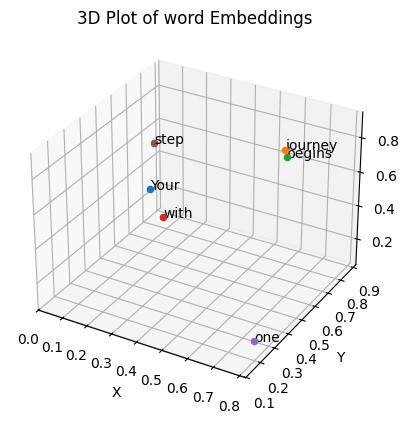

In [161]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ["Your", "journey", "begins", "with", "one", "step"]

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of word Embeddings')
plt.show()

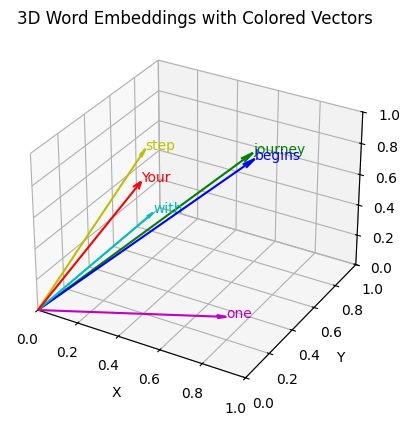

In [162]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Define a list of colors for the the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotatde with the corresponding word
for x, y, z, word, color in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Setb labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title("3D Word Embeddings with Colored Vectors")
plt.show()

CREATE ATTENTION SCORE OF AN EMBEDDED QUERY TOKEN (journey) AND EACH WORD IN THE SEQUENCE
USING THE DOT PRODUCT (SKALARPRODUKT) TO DETERMINE THE ALLIGNMENT OF THE VECTORS
CREATE DOT PRODUCT BETWEEN THE INPUT TOKEN AND THE REMAINING TOKENS TO FIND ATTENTION SCORE BETWEEN TOKENS, THROUGH THE MULTIPLICATION WITH THE COS THE DOT PRODUCT BETWEEN MORE ALLIGNET VECTORS BECOMES HIGHER HENCE THE RELATION (SIMILARITY AND ATTENTION SCORE) BETWEEN THE VECTORS (WORDS) IS MORE SIGNIFICANT

In [163]:
query = inputs[1] # 2nd input token is the query

attn_scores_2 = torch.empty(inputs.shape[0]) # initializing the attention score as an empty tensor first
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query) # dot product

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


tensor holds the attention scores of the query vector embedding with each of the input vector embeddings -> highest score for the second element as this resembles the dot product of the vector with itself (closest relation) and likewise for the other embeddings

NORMALIZATION OF THE ATTENTION SCORES TO OBTAIN ATTENTION WEIGHT THAT SUM UP TO 1
devide every element of the attention score by the sum of all elements

In [164]:
attn_weights_2_tmp = attn_scores_2 / sum(attn_scores_2)

print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.)


attention scores and attention weights mean the same thing -> attention weights sum up to one

SOFTMAX BASED NORMALIZATION -> how does pytorch implements the softmax - be aware

In [165]:
# naive approach -> risk of overflow for very high values and underflow for very small values
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)

print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [166]:
# pytorch implementation of softmax -> always advisable to use the pytorch approach
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


DIVIDE THE VALUES BY 100 GIVES THE PERCENTAGE EACH VALUE SHOULD BE GIVEN ATTENTION TO
MAKES IT EASIER TO INTERPRETE THE VALUES RELATIVE TO ONE (ATTENTION WEIGHTS) AS OPPOSED TO THE ATTENTION SCORE

CHECK OUT THE LINKS TO THE SOFTMAX IN THE INFORMATION SECTION OF THE VIDEO

In [167]:
query = inputs[1] # 2nd input token is the query (journey)
print(query) # token vector embedding for the word "journey"
context_vec_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i # scale each input with the corresponding attention weight
# multiply each input vector embedding with the attention weight and add them together
# look at the 1st vector embedding and scale it with the 1st input weight and so on ...
# at the end adding all the scaled vectors together gives out the context vector for the word journey
print(context_vec_2)

tensor([0.5500, 0.8700, 0.6600])
tensor([0.4419, 0.6515, 0.5683])


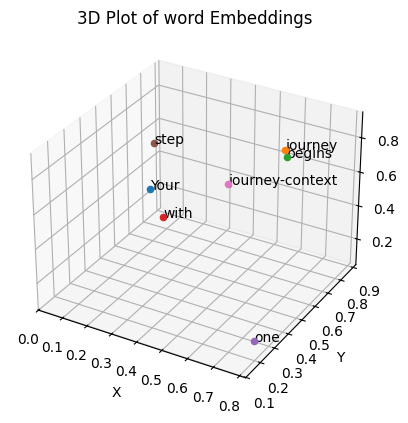

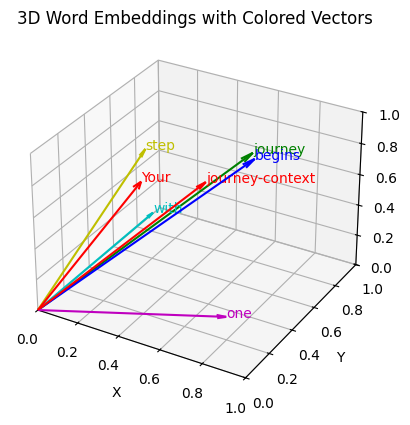

In [168]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs = torch.tensor(
    [[0.43, 0.15, 0.89],    # Your      (x^1)
     [0.55, 0.87, 0.66],    # journey   (x^2)
     [0.57, 0.85, 0.64],    # begins    (x^3)
     [0.22, 0.58, 0.33],    # with      (x^4)
     [0.77, 0.25, 0.10],    # one       (x^5)
     [0.05, 0.80, 0.55],    # step      (x^6)
     [0.4419, 0.6515, 0.5683]]     # journey-context-vector
)

# Corresponding words
words = ["Your", "journey", "begins", "with", "one", "step", "journey-context"]

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Define a list of colors for the the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotatde with the corresponding word
for x, y, z, word, color in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Setb labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title("3D Word Embeddings with Colored Vectors")
plt.show()

In [169]:
"""inputs = torch.tensor(
    [[0.43, 0.15, 0.89],    # Your      (x^1)
     [0.55, 0.87, 0.66],    # journey   (x^2)
     [0.57, 0.85, 0.64],    # begins    (x^3)
     [0.22, 0.58, 0.33],    # with      (x^4)
     [0.77, 0.25, 0.10],    # one       (x^5)
     [0.05, 0.80, 0.55]]    # step      (x^6)
)"""

attn_scores = torch.empty(7, 7)

for i, x_i in enumerate(inputs): # outer loop taking on 1st row of inputs then 2nd then 3rd, 4th, 5th, 6th
    for j, x_j in enumerate(inputs): # inner loop goes through all the input values 
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310, 0.7935],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865, 1.1849],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605, 1.1694],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565, 0.6626],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935, 0.5600],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450, 0.8559],
        [0.7935, 1.1849, 1.1694, 0.6626, 0.5600, 0.8559, 0.9427]])


ALL ATTENTION SCORES

In [170]:
# less computational approach, more efficient
attn_scores = inputs @ inputs.T # input matrix multiplied with the transpose of the input matrix
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310, 0.7935],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865, 1.1849],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605, 1.1694],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565, 0.6626],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935, 0.5600],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450, 0.8559],
        [0.7935, 1.1849, 1.1694, 0.6626, 0.5600, 0.8559, 0.9427]])


NORMALIZATION THE MATRIX ROWS

In [171]:
attn_weights = torch.softmax(attn_scores, dim=-1) # applying the normalizing along the columns, that is why we use -1
print(attn_weights)

tensor([[0.1792, 0.1713, 0.1692, 0.1061, 0.1042, 0.1240, 0.1459],
        [0.1180, 0.2026, 0.1986, 0.1056, 0.0921, 0.1346, 0.1486],
        [0.1184, 0.2017, 0.1981, 0.1058, 0.0943, 0.1332, 0.1485],
        [0.1223, 0.1768, 0.1744, 0.1246, 0.1077, 0.1467, 0.1476],
        [0.1305, 0.1675, 0.1689, 0.1169, 0.1607, 0.1108, 0.1446],
        [0.1180, 0.1861, 0.1813, 0.1211, 0.0842, 0.1615, 0.1478],
        [0.1277, 0.1889, 0.1860, 0.1121, 0.1011, 0.1359, 0.1483]])


In [172]:
# confirm that all rows sum up to 1
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print(row_2_sum)
print("All rows sum:", attn_weights.sum(dim=-1))

1.0
All rows sum: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [173]:
all_context_vec = attn_weights @ inputs
print(all_context_vec)

tensor([[0.4420, 0.6016, 0.5774],
        [0.4419, 0.6515, 0.5683],
        [0.4429, 0.6499, 0.5673],
        [0.4321, 0.6330, 0.5536],
        [0.4635, 0.5997, 0.5326],
        [0.4213, 0.6505, 0.5651],
        [0.4397, 0.6372, 0.5635]])


In [174]:
print("Previous 2nd context vector", context_vec_2)

Previous 2nd context vector tensor([0.4419, 0.6515, 0.5683])


LECTURE 15 --> SELF ATTENTION WITH TRAINABLE WEIGHTS

In [175]:
import torch 

inputs = torch.tensor(
    [[0.43, 0.15, 0.89],    # Your      (x^1)
     [0.55, 0.87, 0.66],    # journey   (x^2)
     [0.57, 0.85, 0.64],    # begins    (x^3)
     [0.22, 0.58, 0.33],    # with      (x^4)
     [0.77, 0.25, 0.10],    # one       (x^5)
     [0.05, 0.80, 0.55]]    # step      (x^6)
)

In [176]:
x_2 = inputs[1] #A ---> the second input element
d_in = inputs.shape[1] #B ---> input embedding size, d=3
d_out = 2 #C ---> output embedding size, d_out=2

Initilization of the key W^k, query W^q and weight W^v matrices which are to be multiplied with the input matrix

In [177]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [178]:
print(W_query)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])


EXAMPLE FOR ONE VECTOR FROM THE INPUT MATRIX, CALCULATE THE DOT PRODUCT BETWEEN QUERY INPUT VECTOR EMBEDDING (3 DIMENSIONAL VECTOR) AND THE QUERY MATRIX (3X2 MATRIX) 3x1 X 3x2 ---> 3x2 MATRIX 
(M x P X M x N --> M x N) LIKEWISE CALCULATING THE DOTPRODUCT BETWEEN THE EXAMPLE VECTOR AND THE KEY MATRIX AND THE VALUE MATRIX ----> WE GET THREE MATRICES IN THE SHAPE 3X2  

In [179]:
query_2 = x_2 @ W_query # x_2 --> vector token embedding for the 2nd row of the input matrix (word: journey)
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value

print(query_2)


tensor([0.4306, 1.4551])


THIS IS THE REPRESENTATION OF ONE ROW (FOR THE 2ND ELEMENT OF THE INPUTMATRIX) FROM THE QUERY MATRIX

In [180]:
queries = inputs @ W_query
keys = inputs @ W_key
values = inputs @ W_value

print("queries.shape", queries.shape)

print("keys.shape", keys.shape)

print("values.shape", values.shape)

queries.shape torch.Size([6, 2])
keys.shape torch.Size([6, 2])
values.shape torch.Size([6, 2])


EACH INPUT TOKEN EMBEDDING (VECTOR 3x1) IS MULTIPLIED WITH A 3x2 QUERY MATRX, 3x2 KEYS MATRIX AND 3x2 VALUES MATRIX ---> transformed from a 3d embedding space into a 2d embedding space

QUERY, KEY AND VALUE ARE TRAINABLE WEIGHT MATRICES !!!

QUERY, KEY AND VALUE MATRICES REPLACE THE INPUT MATRIX AT THIS STAGE

EACH ROW IN THE QUERY, KEY AND VALUE MATRIX STILL REPRESENT THE RESPECTIVE TOKENS IN THE SEQUENCE
EACH TOKEN FORM THE SEQUENCE IS AT THIS STAGE REPRESENTED BY A 2 DIMENSIONAL QUERY VECTOR, A 2 DIMENSIONAL KEY VECTOR AND A 2 DIMENSIONAL VALUE VECTOR

In [181]:
# Computing the attention scores for input 2 "journey" (not using the inputs matrix (consists of the vector embeddings) 
# but using the query matrix 2nd row and computing the dot product between query vector for "journey" and all the other tokens in the keys matrix)
# the resukt is the amount of attention which needs to be given by the query "journey" to the other words in the sequence

keys_2 = keys[1] #A
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


In [182]:
attn_scores_2 = query_2 @ keys.T # All attention scores for given query
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [183]:
# ATTENTION SCORES
attn_scores = queries @ keys.T # omega ---> 6x2 X 2x6 (after transposing the key matrix)
print(attn_scores)

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


first row contains the attention score between the first query and all other keys from the sequence 
second row contains the attention score between the second query and al the other keys fromt he sequence
likewise for the remaining rows

BEFORE THE SOFTMAX NORMALIZATION THE VALUES OF THE ATTENTION SCORES ARE SCALED BY THE SQUARE ROOT OF THE KEYS DIMENSION (2)

In [184]:
d_k = keys.shape[-1] # --> 6 by 2 matrix with the -1 retrieving the dimension (number of columns)
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1) # ** exponential operator in python square root of 2 = to the power of 0.5
print(attn_weights_2)
print(d_k)


tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])
2


ILLUSTRATION WHY WE SCALE BY THE SQUARE ROOT OF THE DIMENSION OF THE KEY MATRIX

REASON 1 --> FOR STABILITY IN LEARNING BY CONSIDERING THE SENSITIVITY OF THE SOFTMAX FUNCTION TO THE MAGNITUDE OF ITS INPUTS , AVOID PEAKS IN THE OUTPUT AND THAT PROBABILITY MASS SHIFTS TO ONE VALUE

In [185]:
import torch

# Define the tensor
tensor = torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])

# Apply softmax without scaling
softmax_result = torch.softmax(tensor, dim=-1)
print("Softmax without scaling:", softmax_result)

# Multiply the tensor by 8 and then apply softmax
scaled_tensor = tensor * 8
softmax_scaled_result = torch.softmax(scaled_tensor, dim=-1)
print("Softmax after scaling:", softmax_scaled_result) # last value shows peak, unproportional high

Softmax without scaling: tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])
Softmax after scaling: tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])


REASON 2 --> Dividing by the square root of the dimension keeps the values close to 1 

In [186]:
import numpy as np

# Function to compute variance before and after scaling
def compute_variance(dim, num_trails=1000):
    dot_products = []
    scaled_dot_products = []

    # Generate multiple random vectors and compute dot products
    for _ in range(num_trails):
        q = np.random.randn(dim)
        k = np.random.randn(dim)

        # Compute dot product
        dot_product = np.dot(q, k)
        dot_products.append(dot_product)

        # Scale the dot product by sqrt(dim)
        scaled_dot_product = dot_product / np.sqrt(dim)
        scaled_dot_products.append(scaled_dot_product)

    # Calculate variance of the dot products
    variance_before_scaling = np.var(dot_products)
    variance_bafter_scaling = np.var(scaled_dot_products)

    return variance_before_scaling, variance_bafter_scaling

# For dimension 5
variance_before_5, variance_after_5 = compute_variance(5)
print(f"Variance before scaling (dim = 5): {variance_before_5}")
print(f"Variance after scaling (dim = 5): {variance_after_5}")

# For dimension 20
variance_before_20, variance_after_20 = compute_variance(20)
print(f"Variance before scaling (dim = 20): {variance_before_20}")
print(f"Variance after scaling (dim = 20): {variance_after_20}")



Variance before scaling (dim = 5): 4.828012000676613
Variance after scaling (dim = 5): 0.9656024001353226
Variance before scaling (dim = 20): 20.568407910604837
Variance after scaling (dim = 20): 1.0284203955302418


AS THE DIMENSIONS OF THE KEY VECTOR INCREASE THE VARIANCE INCREASES ALSO WHEN SCALING IS NOT PERFORMED --> DIM = 5 -> VARIANCE CLOSE TO 5 AND THIS INCREASES AS DIMENSIONS GET LARGER --> BECAUSE TWO RANDOM NUMBERS ARE GENERATED WHICH ARE TO BE OPTIMIZED IN THE TRAINING STAGE, GENERATING RANDOM NUMBERS INCREASES THE VARIANCE

IF SCALING IS APPLIED THE VARIANCE IS ALWAYS AROUND 1 

if the variance is very high the learning becomes unstable and computational issues might occur

In [187]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


In [188]:
# attention scores are found by calculating the dot product between the queries matrix with the keys matrix 6x2 X 2x6 --> 6x6 matrix
# finding the context vectors for all queries square rooting the attn scores and normalizing them and then multiplying the attention weights matrix 
# with the values matrix 6x6 X 6x2 --> 6x2 matrix
attn_weights_all = torch.softmax(attn_scores / d_k**0.5, dim=-1)
print(attn_weights_all)
context_vec_all = attn_weights_all @ values
print(context_vec_all)

tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])
tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])


In [189]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):

    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))
    
    def forward(self, x):
        queries = x @ self.W_query
        keys = x @ self.W_key
        values = x @ self.W_value

        attn_scores = queries @ keys.T # omega
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )

        context_vec = attn_weights @ values
        return context_vec

In [190]:
# self attention version 1
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(inputs.shape)
print(sa_v1(inputs))

torch.Size([6, 3])
tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


creating a second SelfAttention class using the LINEAR function in pytorch --> this has an optimized weight initialization schema, contributing to more effective and stable model training

In [191]:
class SelfAttention_v2(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
    
    def forward(self, x):
        queries = self.W_query(x)
        keys = self.W_key(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )

        context_vec = attn_weights @ values
        return context_vec

In [192]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


-> SELF ATTENTION INVOLVES THE THE TRAINABLE WEIGHT MATRICES Wq, Wk AND Wv
-> THESE MATRICES TRANSFORM INPUT DATA INTO QUERIES, KEYS AND VALUES WHICH ARE CRUCIAL COMPONENTS OF THE ATTENTION MECHANISM

QUERY -> ANALOGOUS TO THE SEARCH QUERY IN A DTABASE: IT REPRESENTS THE CURRENT TOKEN THE MODEL FOCUSES ON
KEY -> IN ATTENTION MECHANISM, EACH ITEM IN THE INPUT SEQUENCE HAS A KEY. KEYS ARE USED TO MATCH WITH THE QUERY
BY COMPUTING THE QUERY AND THE KEY WE GET THE ATTENTION SCORE WHICH IS THEN TO BE PROCESSED BY COMPUTING THE SQUARE ROOT OF THE KEY DIMENSION AND THE NORMALIZATION
VALUES -> IT REPRESENTS THE ACTUAL CONTENT OR REPRESENTATION OF THE INPUT ITEMS. ONCE THE MODEL DETERMINES WHICH KEYS (WHICH PARTS OF THE INPUTS) ARE MOST RELEVANT TO THE QUERY (CURRENT FOCUS ITEM), IT RETRIEVES THE CORRESPONDING VALUES

LECTURE 16 --> CASUAL ATTENTION APPROACH

THIS APPROACH MASKS OUT THE ATTENTION WEIGHTS OF THE FUTURE EMBEDDINGS --> IT UTILIZES LOWER TRIANGULAR MATRIX (VALUES ABOVE THE DIAGONAL ARE ALL 0) BY SETTING THE VALUES TO 0, THIS IS ACHIEVED BY THE THE PYTORCH FUNCTION tril, LIKEWISE THE UPPER TRIANGULAR MATRIX IS CREATED BY THE PYTORCH FUNCTION triu
ONLY THE CURRENT THE THE PAST EMBEDDINGS ARE TAKEN UNDER CONSIDERATION

In [193]:
queries = sa_v2.W_query(inputs) #A
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [194]:
print(torch.ones(context_length, context_length))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [195]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length)) # tril function sets the values above the diagonal within the matrix to 0
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [196]:
masked_simple = attn_weights*mask_simple
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [197]:
rows_sum = masked_simple.sum(dim=1, keepdim=True)
masked_simple_norm = masked_simple / rows_sum
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


DRAWBACK OF THIS APPROACH IS DATA LEAKAGE BECAUSE ZEROING OUT AFTER THE SOFTMAX APPROACH MEANS THAT THE VALUES THAT REMAIN IN THE LOWER TRIANGULAR MATRIX WHICH AT THIS STAGE HAS ALREADY BEEN NORMALIZED ARE STILL INFLUENCED BY THE FUTURE VALUES FROM AN EARLIER STEP AND CONTAIN THEREFOR WEIGHTS OF THESE VALUES THAT SHOULD NOT BE THERE WHEN FUTURE TOKENS ARE NOT THE CONSIDERED AT ALL

UPPER TRIANGULAR INFINITY MASK

In [198]:
# working from the stage of the attention scores matrix makes sure that the softmax influence of future tokens on current and past tokens does not come into effect
print(attn_scores)

tensor([[ 0.2899,  0.0716,  0.0760, -0.0138,  0.1344, -0.0511],
        [ 0.4656,  0.1723,  0.1751,  0.0259,  0.1771,  0.0085],
        [ 0.4594,  0.1703,  0.1731,  0.0259,  0.1745,  0.0090],
        [ 0.2642,  0.1024,  0.1036,  0.0186,  0.0973,  0.0122],
        [ 0.2183,  0.0874,  0.0882,  0.0177,  0.0786,  0.0144],
        [ 0.3408,  0.1270,  0.1290,  0.0198,  0.1290,  0.0078]],
       grad_fn=<MmBackward0>)


In [199]:
torch.triu(torch.ones(context_length, context_length))

tensor([[1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.]])

In [200]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
print(mask)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])


In [201]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [202]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


MASKING ADDITIONAL ATTENTION WEIGHTS WITH DROPOUT


DROPOUT SWITCHES OF ATTENTION WEIGHTS RANDOMLY 

IT IS USED IN AS A DEEP LEARNING TECHNIQUE WHERE RANDOMLY SELECTED HIDDEN LAYER UNITS ARE IGNORED DURING TRAINING

THIS PREVENTS OVERFITTING AND IMPROVES GENERALIZATION PERFORMANCE

IN TRANSFORMER ARCHITECTURE, INCLUDING MODELS LIKE GPT, DROPOUT IN THE ATTENTION MECHANISM IS APPLIED IN 2 SPECIFIC AREAS

AFTER CALCULATING ATTENTION SCORES AND AFTER CALCULATING ATTENTION WEIGHTS TO VALUE VECTORS

IT IS MOST COMMON TO APPLY DROPOUT AFTER CALCULATING THE ATTENTION WEIGHTS


IN THE FOLLOWING CODE EXAMPLE, WE USE A DROPOUT OF 50%, WHICH MEANS MASKING OUT HALF OF THE ATTENTION WEIGHTS.
WHEN TRAINING THE GPT MODEL IN LATER CHAPTERS A LOWER DROPOUT RATE IS USED, 10% OR 20%


In [203]:
print(torch.ones(6, 6))

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])


In [204]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) #A
example = torch.ones(6, 6) #B
print(dropout(example))

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


In [205]:
# applying dropout to the attention weight matrix
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


In [206]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [ ]:
import torch.nn as nn

class CasualAttention(nn.Module):
    
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout) #New
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1)) #  New
    
    def forward(self, x):
        b, num_tokens, d_in = x.shape # New batch dimension b
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.transpose(1, 2) # Changed transpose
        attn_scores.masked_fill_(  # New, _ ops are in-place
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf # :num_tokens to account for cases where the number of tokens in the batch is smaller than the the supported context length
        )

        attn_weights = torch.softmax(
            attn_scores / keys.shape[1]**0.5, dim=-1
        )
        attn_weights = self.dropout(attn_weights) # New

        context_vec = attn_weights @ values
        return context_vec

In [208]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CasualAttention(d_in, d_out, context_length, 0.0) # dropout rate set to 0 for now
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


torch.Size is 2 Matrices 6x2 staked on top of each other as the batch size is 2 (2 sentences)

In [209]:
print(context_vecs)

tensor([[[-0.4519,  0.2216],
         [-0.5856,  0.0087],
         [-0.6284, -0.0607],
         [-0.5664, -0.0832],
         [-0.5511, -0.0978],
         [-0.5290, -0.1073]],

        [[-0.4519,  0.2216],
         [-0.5856,  0.0087],
         [-0.6284, -0.0607],
         [-0.5664, -0.0832],
         [-0.5511, -0.0978],
         [-0.5290, -0.1073]]], grad_fn=<UnsafeViewBackward0>)


LECTURE 17 AND LECTURE 18 --> MULTI HEAD ATTENTION MECHANISM 

THE TERM MULTI HEAD REFERS TO DIVIDING THE ATTENTION MECHANISM INTO MULTIPLE HEADS -> EACH OPERATING ON ITS OWN
ONE ATTETION HEAD IS REPRESENTED BY ONE QUERIES MATRIX, ONE KEYS MATRIX AND ONE VALUES MATRIX (SINGLE HEAD ATTENTION LAYER)

- STACKING MULTIPLE SINGLE HEAD ATTENTION LAYERS TOGETHER

- IMPLEMENTING MULTIHEAD ATTENTION INVOLVES CREATING MULTIPLE INSTANCES OF THE SELF-ATTENTION MECHANISM, EACH WITH ITS OWN WEIGHTS, AND THEN COMBINING THEIR OUTPUTS

- THIS INCREASES THE COMPUTATIONAL INTENSITY BUT IT MAKES THE LLMs MORE POWERFUL AT COMPLEX PATTERN RECOGNITION TASKS

MAIN IDEA BEHIND MULTI-HEAD ATTENTION
RUN THE ATTENTION MECHANISM MULTIPLE TIMES (IN PARALLEL) WITH DIFFERENT, LEARNED LINEAR PROJECTIONS:
THE RESULTS OF MULTIPLYING INPUT DATA (LIKE QUERY, KEY AND VALUE VECTORS) BY A WEIGHT MATRIX



In [210]:
class MultiHeadAttentionWrapper(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CasualAttention(d_in, d_out, context_length, dropout, qkv_bias)
             for _ in range(num_heads)]
        )
    
    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)

In [211]:
inputs = torch.tensor(
    [[0.43, 0.15, 0.89],    # Your      (x^1)
     [0.55, 0.87, 0.66],    # journey   (x^2)
     [0.57, 0.85, 0.64],    # begins    (x^3)
     [0.22, 0.58, 0.33],    # with      (x^4)
     [0.77, 0.25, 0.10],    # one       (x^5)
     [0.05, 0.80, 0.55]]    # step      (x^6)
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [212]:
torch.manual_seed(123)
context_length = batch.shape[1]
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5856,  0.0087,  0.5840,  0.3158],
         [-0.6284, -0.0607,  0.6161,  0.3779],
         [-0.5664, -0.0832,  0.5468,  0.3557],
         [-0.5511, -0.0978,  0.5317,  0.3416],
         [-0.5290, -0.1073,  0.5072,  0.3465]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5856,  0.0087,  0.5840,  0.3158],
         [-0.6284, -0.0607,  0.6161,  0.3779],
         [-0.5664, -0.0832,  0.5468,  0.3557],
         [-0.5511, -0.0978,  0.5317,  0.3416],
         [-0.5290, -0.1073,  0.5072,  0.3465]]], grad_fn=<CatBackward0>)


('context_vecs.shape:', torch.Size([2, 6, 4]))

REDUCING THE NUMBER MATRIX MULTIPLICATIONS AT THE START OF THE PROCEDURE, DEPENDING ON HOW MANY HEADS THERE ARE THE NUMBER OF MATRIX MULTIPLICATIONS INCREASES AND WITH IT THE COMPUATION --> IF THERE ARE THREE HEADS THERE ARE THREE WEIGHT MATRICES Wq, Wk and Wv which are multiplied with the input embeddings resulting in three queries matrices, three keys matrices and three value matrices ... therefor a way is introduced that reduceses the number of operations when multiple heads are used ...

MULTIHEAD ATTENTION WITH WEIGHT SPLITS

originally the weight matrices which are multiplied with the inputs are of 6 by 2 --> with split weights the weight matrices are of 6 by 4 meaning there are double the number of colums (depending on the number of heads to be used, in this case 2 heads, hence double) resulting in a queries matrix (same for keys and values) which is of dimension 4 ... this matrix is then simply split by dimension / number of heads

In [213]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"
        
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_in) # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length), diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape   # number of batches b, number of tokens in the sequence, number of dimensions (columns)
                                        # d_out typically is choosen to be equal to d_in hence d_out = 6, number of heads is choosen to be 2 
                                        # -> (head_dim = d_out / num_heads)
        queries = self.W_query(x)
        keys = self.W_key(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a 'num_heads' dimension
        # Unroll last dim: (b, numn_tokens, d_out) --> (b, num_heads, num_tokens, head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) --> (b, num_heads, num_tokens, head_dim)
        queries = queries.transpose(1, 2)
        keys = keys.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with casual mask
        attn_scores = queries @ keys.transpose(2, 3) # Dot-product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2)

        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

Steps in the MUltiHead Attention with split weights

Step 1: Reduce the projection dim to match the output dim

Step 2: Use a linear layer to combine head outputs

Step 3: Tensor shape: (b, num_tokens, d_out)

Step 4: We implicitly split the matrix by adding a num_heads dimension. Then we unroll the last dimension: 
            (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)

Step 5: Transpose from shape (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim) -> Transpose(1, 2) switches the 2. element and the 3. element

Step 6: Compute dot-product for each head

Step 7: Mask truncated to the number of tokens --> essentially apply a lower triangular matrix

Step 8: Use the mask to fill attention scores

Step 9: Tensor shape: (b, num_tokens, n_heads, head_dim)

Stept 10: Combine heads, where self.d_out = self.num_heads * self.head_dim

Step 11: Add an optional linear projection

In [214]:
torch.manual_seed(123)

# Define the tensor with 3 rows and 6 columns
inputs = torch.tensor(
    [[0.43, 0.15, 0.89, 0.55, 0.87, 0.66],  # Row 1
     [0.57, 0.85, 0.64, 0.22, 0.58, 0.33],  # Row 2
     [0.77, 0.25, 0.10, 0.05, 0.80, 0.55]]  # Row 3
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

batch_size, context_length, d_in = batch.shape
d_out = d_in # 6
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

torch.Size([2, 3, 6])
tensor([[[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]],

        [[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]]],
       grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 3, 6])


LECTURE 19 --> BIRDS EYE VIEW OF THE LLM ARCHITECTURE

----------  LLM ARCITECTURE  ---------------

IMPLEMENTING A GPT MODEL FROM SCRATCH TO GENERATE TEXT

In [215]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary Size
    "context_length": 1024, # Using 1024 words to predict the next word
    "emb_dim": 768,         # Vector embedding dimension for each token
    "n_heads": 12,          # Number of Attention Heads
    "n_layers": 12,         # Number of Transformer Blocks
    "drop_rate": 0.1,       # 10% of the training weights are masked (turned off to increase alert of remaining weights)
    "qkv_bias": False       # Query-Key-Value bias
}

GPT ARCHITECTURE PART 1: DUMMY GPT MODEL CLASS

In [216]:
import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # Use a placeholder for Transformer Block
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )
        
        # Use a placeholder for Layer Norm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds =  self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder
    
    def forward(self, x):
        # This block does nothing and just returns its input
        return x
    
class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        # The parameters are just to mimic the LayerNorm interface
    
    def forward(self, x):
        # This block does nothing and just returns its input
        return x

In [217]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [218]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-0.9289,  0.2748, -0.7557,  ..., -1.6070,  0.2702, -0.5888],
         [-0.4476,  0.1726,  0.5354,  ..., -0.3932,  1.5285,  0.8557],
         [ 0.5680,  1.6053, -0.2155,  ...,  1.1624,  0.1380,  0.7425],
         [ 0.0448,  2.4787, -0.8843,  ...,  1.3219, -0.0864, -0.5856]],

        [[-1.5474, -0.0542, -1.0571,  ..., -1.8061, -0.4494, -0.6747],
         [-0.8422,  0.8243, -0.1098,  ..., -0.1434,  0.2079,  1.2046],
         [ 0.1355,  1.1858, -0.1453,  ...,  0.0869, -0.1590,  0.1552],
         [ 0.1666, -0.8138,  0.2307,  ...,  2.5035, -0.3055, -0.3083]]],
       grad_fn=<UnsafeViewBackward0>)


In [219]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 77,981,184


LECTURE 20 --> LAYER NORMALIZATION

LAYER NORMALIZATION 

1st positive effect:
keeps the gradients staple --> ensures stable training dynamics --> essentially the outputs of ther hidden layers effect the gradients, if the outputs become too large the respective gradients also grow in size and then during backpropagation by the time the first layer is reached the values might have become very large which can cause GRADIENT EXPLOSION, likewise if the values are too small the parametres might not be updated (VANISHING GRADIENT) which causes the stagnation of the learning

2nd positive effect:
prevents internal covariate shift --> when the distributions of the values change is the training procedure also effected in a negative way because the updating of the weights becomes harder ... the distribution can change from one iteration to the next which wants to be avoided by Layer Normalization --> variance of the standard deviation is kept to 1 making sure that the mean and the standard deviation from every layer output is fixed

THAT IS WHY LAYER NORMALIZATION IS VERY FREQUENTLY USED IN MANY DEEP LEARNING ARCITECTURES 

MAIN IDEA --> SET THE MEAN EQUAL TO 0 AND THE VARIATION EQUAL TO 1

LAYER NORMALIZATION IN CODE EXAMPLE

In [220]:
torch.manual_seed(123)
batch_example = torch.randn(2, 5) #A 2 batches with 5 inputs each
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU()) #sequential layer takes in 5 inputs and creates 6 outputs
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [221]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("Mean:\n", var)
print("Variance:\n", var)

Mean:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [222]:
out_norm = (out - mean) / torch.sqrt(var) # main normalization step
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Normalized layer outputs:\n", out_norm)
print("Mean:\n", mean)
print("Var:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Var:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [223]:
torch.set_printoptions(sci_mode=False) # turn of scientific function to show the values for the mean of both batches are actually 0
print("Mean:\n", mean)
print("Var:\n", var)

Mean:
 tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Var:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


CLASS IMPLEMENTATION

In [224]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))
    
    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

In [225]:
print(batch_example)

tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969],
        [ 0.2093, -0.9724, -0.7550,  0.3239, -0.1085]])


In [226]:
# create an instance of the Layer Normalization class
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, keepdim=True, unbiased=False)
print(out_ln)
print("Mean:\n", mean)
print("Var:\n", var)

tensor([[ 0.5528,  1.0693, -0.0223,  0.2656, -1.8654],
        [ 0.9087, -1.3767, -0.9564,  1.1304,  0.2940]], grad_fn=<AddBackward0>)
Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Var:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


LAYER NORMALIZATION vs BATCH NORMALIZATION

layer normalization does not depend on the batch size, we normalize along the feature dimension (much more flexible)

batch normalization performs the normalization on an entire batch (depends on the batch size) --> not as flexible because of the dependency of the batch size (if hardware is not powerful enough the batchsize must be lower)

LECTURE 21 --> GELU ACTIVATION FUNCTION 

    AND THE FEED FORWARD NEURAL NETWORK

implementation of a small neural network as a sub module of the llm transformer block

GELU --> ACTIVATION FUNCTION

In [227]:
# implementation of the GELU Function
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) * 
            (x + 0.044715 * torch.pow(x, 3))
        ))

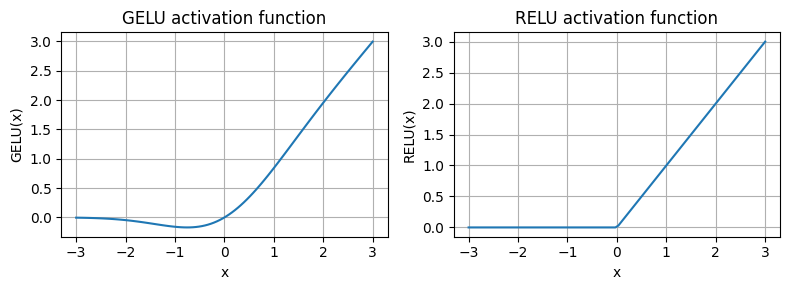

In [228]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "RELU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [229]:
# using the gelu function to implement a small neural network module
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential( # constructor for neural network
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]), ## Expansion
            GELU(), ## Activation
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]) ## Contraction
        )
    
    def forward(self, x):
        return self.layers(x)

In [230]:
print(GPT_CONFIG_124M["emb_dim"])

768


In [231]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768) #A
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


LECTURE 22 --> SHORTCUT CONNECTIONS
aka skip connection or residual connections

flowing direction of the gradient is from the last layer to the first layer

solves the problem of vanishing gradient by skipping one or more layers during back propagation

In [232]:
# code implementation of the shortcut connection
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_size, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_size[0], layer_size[1]), GELU()),
            nn.Sequential(nn.Linear(layer_size[1], layer_size[2]), GELU()),
            nn.Sequential(nn.Linear(layer_size[2], layer_size[3]), GELU()),
            nn.Sequential(nn.Linear(layer_size[3], layer_size[4]), GELU()),
            nn.Sequential(nn.Linear(layer_size[4], layer_size[5]), GELU())
        ])
    
    def forward(self, x):
        for layer in self.layers:
            # Compute the output of the current layer
            layer_output = layer(x)
            # Check if shortcut can be applied
            if self.use_shortcut and x.shape == layer_output.shape:
                x = x + layer_output
            else:
                x = layer_output
        return x

In [233]:
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123) # specify random seed for the initial weights for reproductibility
model_without_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=False
)

In [234]:
def print_gradients(model, x):
    # Forward pass
    output = model(x)
    target = torch.tensor([[0.]])

    # Calculate loss based on how close the target and output are
    loss = nn.MSELoss()
    loss = loss(output, target)

    # Backward pass to calculate the gradients
    loss.backward()

    for name, param in model.named_parameters():
        if "weight" in name:
            # print the mean absolute gradient of the weights
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In [235]:
# as going back towards the first layer during back propagation the value reaches almost 0
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020173587836325169
layers.1.0.weight has gradient mean of 0.0001201116101583466
layers.2.0.weight has gradient mean of 0.0007152041653171182
layers.3.0.weight has gradient mean of 0.001398873864673078
layers.4.0.weight has gradient mean of 0.005049646366387606


In [236]:
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=True
)

In [237]:
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.22169792652130127
layers.1.0.weight has gradient mean of 0.20694105327129364
layers.2.0.weight has gradient mean of 0.32896995544433594
layers.3.0.weight has gradient mean of 0.2665732502937317
layers.4.0.weight has gradient mean of 1.3258541822433472


LECTURE 23 --> TRANSFORMER BLOCK 
        
        GTP ARCHITECTURE: CODING ATTENTION AND LINEAR LAYERS 

In [238]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary Size
    "context_length": 1024, # Using 1024 words to predict the next word
    "emb_dim": 768,         # Vector embedding dimension for each token
    "n_heads": 12,          # Number of Attention Heads
    "n_layers": 12,         # Number of Transformer Blocks, number of transformers
    "drop_rate": 0.1,       # 10% of the training weights are masked (turned off to increase alert of remaining weights)
    "qkv_bias": False       # Query-Key-Value bias
}

In [239]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))
    
    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) * 
            (x + 0.044715 * torch.pow(x, 3))
        ))

class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential( # constructor for neural network
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]), ## Expansion
            GELU(), ## Activation
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]) ## Contraction
        )
    
    def forward(self, x):
        return self.layers(x)

In [240]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in = cfg["emb_dim"],
            d_out = cfg["emb_dim"],
            context_length = cfg["context_length"],
            num_heads = cfg["n_heads"],
            dropout = cfg["drop_rate"],
            qkv_bias = cfg["qkv_bias"]
        )
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])
    
    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)
        x = self.att(x) # Shape[batch_size, num_tokens, emb_size]
        x = self.drop_shortcut(x)
        x = x + shortcut # Add the original input back

        shortcut = x 
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut # Add the original input back

        return x

In [241]:
torch.manual_seed(123)
x = torch.randn(2, 4, 768) #A
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)
print("Input shape:", x.shape)
print("Output shape:", output.shape)

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])


ASSEMBLE THE FULLY WORKING EXAMPLE FOR THE GPT2 MODEL

In [242]:
import torch
import torch.nn as nn

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # Use a placeholder for Transformer Block
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )
        
        # Use a placeholder for Layer Norm
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds =  self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [243]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[ 0.1381,  0.0077, -0.1963,  ..., -0.0222, -0.1060,  0.1717],
         [ 0.3865, -0.8408, -0.6564,  ..., -0.5163,  0.2369, -0.3357],
         [ 0.6989, -0.1829, -0.1631,  ...,  0.1472, -0.6504, -0.0056],
         [-0.4290,  0.1669, -0.1258,  ...,  1.1579,  0.5303, -0.5549]],

        [[ 0.1094, -0.2894, -0.1467,  ..., -0.0557,  0.2911, -0.2824],
         [ 0.0882, -0.3552, -0.3527,  ...,  1.2930,  0.0053,  0.1898],
         [ 0.6091,  0.4702, -0.4094,  ...,  0.7688,  0.3787, -0.1974],
         [-0.0612, -0.0737,  0.4751,  ...,  1.2463, -0.3834,  0.0609]]],
       grad_fn=<UnsafeViewBackward0>)


In [244]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 163,009,536


STEP BY STEP INPUT PROCEDURE FROM THE INITIAL TEXT TO THE INPUT VECTOR EMBEDDINGS

INPUT TEXT = EVERY EFFORT MOVES YOU --> 4 WORDS FOR SIMPLICITY REPRESENTED BY THE 4 TOKEN IDS WHICH ARE IN THE VOCABULARY FOR GPT2 WHICH CONSISTS OF 50257 TOKENS

1. STEP: (TOKEN EMBEDDINGS) EACH OF THE 4 TOKENS FROM THE INPUT TEXT IS TRANSLATED INTO A 768 DIMENSIONAL TOKEN EMBEDDING VECTOR IN ORDER TO CAPTURE THE SEMANTICAL MEANING OF THE TOKEN
--> THAT LEAVES US WITH 4 TOKEN EMBEDDING VECTORS WITH 768 DIMENSIONS

2. STEP: (POSITIONAL EMBEDDINGS) IN ORDER TO CAPTURE THE POSITIONAL MEANING OF THE TOKENS WITHIN THE SEQUENCE A POSITIONAL EMBEDDING IS INTRODUCED WHEREBY THE NUMBER OF POSITIONAL EMBEDDINGS FOR EACH INPUT SEQUENCE IS DETERMINED BY THE NUMBER OF POSITIONS 

AS THERE ARE 4 TOKENS WE HAVE 4 POSITIONS AND EACH OF THESE 4 POSITIONS GETS A POSITIONAL EMBEDDING ASSIGNED WHICH IS OF THE SAME DIMENSION AS THE TOKEN EMBEDDING 768

3. (INPUT EMBEDDINGS) STEP: FOR THE INPUT VECTOR THAT IS FED TO THE TRANSFORMER THE POSITIONAL EMBEDDINGS ARE ADDED TO THE VECTOR EMBEDDINGS IN A WAY THAT THE 1ST TOKEN EMBEDDING IS ADDED TO THE POSITIONAL VECTOR FOR THE 1ST POSITION AND SO ON 

THAT MEANS THAT WE GET 4 INPUT VECTORS WITH A DIMENSION (EMBEDDING SIZE) OF 768 EACH


4. STEP: (DROPOUT) DROPOUT IS APPLIED TO THE INPUT EMBEDDING VECTORS --> RANDOMLY TURNS OF ELEMENTS OF EVERY INPUT EMBEDDINGS, WHEN THE RATE IS 0.5 THEN 50% ELEMENTS ON AVERAGE OF EACH INPUT EMBEDDING ARE TURNED OF TO 0 IN ORDER TO PREVENT OVERFITTING DURING TRAINING WHEN NEURONS TEND TO BECOME LAZY AS OTHER NEURONS DO MUCH OF THE WORK --> DROPOUT FORCES THE LAZY NEURONS TO WORK AND GET INVOLVED IN THE TRAINING PROCESS AND PREVENTS FROM VALUES NOT BEING PROCESSED AND PASSED ON TO THE NEXT STEP, IMPROVES GENERALIZATION PERFORMANCE AS EVERY NEURON IS INVOLVED IN THE LEARNING

STILL EVERY VECTOR STILL KNOWS ONLY ABOUT ITSELF BUT DOES NOT RELATE TO OTHER VECTORS IN THE CONTEXT  --> THAT WILL BE DONE BY THE ATTENTION MECHANISM

ENTERING THE TRANSFORMER BLOCK

5. STEP: LAYER (NORMALIZATION) WHEN NORMALIZING WE LOOK AT EACH INPUT EMBEDDING AND APPLY NORMALIZATION SO THAT THE MEAN VALUE IS EQUAL TO 0 AND THE VARIANCE IS EQUAL TO 1 ALONG THE EMBEDDING SIZE (768 DIMENSIONS OF THE EMBEDDING) --> IT IMPROVES THE STABILITY DURING THE TRAINING PROCEDURE

6. STEP: MASKED MULTIHEAD ATTENTION (TRANSFORMING INPUT VECTORS TO CONTEXT VECTOR EMEBDDINGS) CAPTURING THE AMOUNT OF ATTENTION THAT IS TO BE GIVEN TO THE REMAINING TOKENS IN THE SEQUENCE (SENTENCE) THE INPUT EMBEDDING MATRIX OF THE SIZE CONTEXT-LENGTH AND DIMENSION 768 IS MULTIPLIED WITH 3 WEIGHT MATRICES, 1ST WEIGHT MATRIX IS FOR THE QURIES, THE 2NG WEIGHT MATRIX IS FOR THE KEYS AND THE 3RD WEIGHT MATRIX IS FOR THE VALUES, RESULTING IN 3 MATRICES QUERIES, KEYS AND VALUES, NEXT THE QUERIES MATRIX IS MULTIPLIED WITH THE KEYS MATRIX AND THEN THE RESULT IS FURTHER PROCESSED AND A LOWER TRIANGULAR MATRIX IS APPLIED THAT PREVENTS FUTURE TOKENS FROM BEING CONSIDERED IN THE RESULTING CONTEXT MATRIX, ALSO THERE IS A NORMALIZATION USING THE SOFTMAX FUNCTIONALITY FROM PYTORCH WHICH TRANSFORMS THE VALUES SO THAT THEY RESULT IF ADDED ALONG THE DIMENSION TO 1, THIS PROVIDES INTERPRETABLE INFORMATION ABOUT THE WEIGHT OF MEANING EACH TOKEN HAS TO BE GIVEN IN RESPECT TO THE RAMINING TOKENS IN THE CONTEXT LENGTH (NOT CONSIDERING FUTUR TOKENS)

WHEN THIS STEP IS DONE THE RESULTING NORMALIZED TRIANGULAR MATRIX IS MULTIPLIED WITH THE VALUES MATRIX WHICH RESULTS IN THE CONTEXT MATRIX FOR THE INPUT EMBEDDINGS
DURING THE PROCESS THE EMBEDDING DIMENSIONS ARE PRESERVED. SO THE SIZE OF THE CONTEXT EMBEDDING MATRIX IS CONTEXT LENGTH BY EMBEDDING DIMENSION OF 768

7. STEP: ANOTHER DROPOUT IS APPLIED TO THE CONTEXT VECTOR THIS TIME

8. STEP: SHORTCUT CONNECTION MEANS THAT EVERY OUTPUT OF THE CONTEXT DROPOUT LAYER IS ADDED BACK TO THE INPUT WHICH WE STARTED WITH AND IT PROVIDES ANOTHER PATH FOR THE GRADIENT TO FLOW AND IT PREVENTS THE VANISHING GRADIENT

9. STEP: LAYER NORMALIZATION FOLLOWING SAME PROCEDURE AS BEFORE

10. STEP: FEED FORWARD NEURAL NETWORK EXPANDING NETWORK SO THE INPUT ARE THE TOKENS OF THE INPUT WHICH EACH TOKEN HAS A DIMENSION OF 768, IN THE NEURAL NETWORK EACH TOKEN IS LOOKED AT SEQUENTIALLY, PROJECTING THE INPUT IN A HIGHER DIMANSIONAL SPACE, THE NN HAS A HIDDEN LAYER WITH A DIMENSION WHICH IS 4 TIMES HIGHER THAN THE INPUT DIMENSION AND THEN WE CONTRACT BACK TO THE INPUT DIMENSION, THE EXPANSION ALLOWS FOR A RICHER EXPLORATION OF PARAMETERS

11. STEP: ANOTHER DROPOUT LAYER WHICH SWITCHES OF ELEMENTS TO 0 LIKE BEFORE

12. STEP: SHORTCUT CONNECTION ADDS INPUT VALUE TO LAYER OUTPUT TO PREVENT VANISHING GRADIENT

13. STEP: OUTPUT FROM THE SHORT CUT CONNECTION IS OUTPUT FROM THE TRANFROMER BLOCK

WHITEBOARD STEPS: LAYER NORM OF INPUT --> MASKED MULTI HEAD ATTENTION --> DROPOUT --> SHORTCUT CONNECTION --> LAYER NORM --> FEED FORWARD --> DROPOUT --> SHORTCUT CONNECTION

AFTER THE TRANSFORMER

LAYER NORMALIZATION

OUTPUT HEAD WITH INPUT MATRIX OF CONTEXT LENGTH AND EMBEDDING DIMENSION GOES THROUGH NEURAL NETWORK OF SIZE 768 X 50257 WITH OUTPUT MATRIX 4 (FOR EVERY TOKEN) X 50257 FOR EVERY TOKEN 
50257 (VOCABULARY SIZE) IN ORDER TO PREDICT THE NEXT WORD WITHIN THE INPUT SEQUENCE FROM THE VOBAULARY SIZE WHICH CONSISTS OF 50257 ENTRIES WITH THE LOGITS (PROBABILITY VALUES WHICH HAVE YET TO BE NORMALIZED USING THE SOFTMAX IN ORDER TO MAKE THEM INTERPRETABLE) VALUES WHICH DETERMINE THROUGH VALUE THE WORD THAT IS MOST LIKELY TO COME NEXT, WHICH AGAIN IDEALY SHOULD CORRESPOND WITH THE FOLLOWING WORD IN THE SEQUENCE UP TO THE LAST WORD WHICH IS YET TO BE PREDICTED, FOR ONE BATCH 1 X CONTEXT LENGTH X VOCABULARY SIZE, THE PLACE OF THE WORD WITH THE HIGHEST PROBABILITY VALUE AFTER APPLYING THE SOFTMAX (PERCENTAGE CAN BE DRIEVED) WITHIN THE VOCABULARY SIZED VECTOR INDICATES THE TOKEN ID AND IN THAT WAY THE WORD CAN BE DETERMINED WHICH IS THEN APPENDED TO THE INPUT FOR THE NEXT ITERATION

In [245]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


In [246]:
total_params_gpt2 = total_params - sum(p.numel() for p in model.out_head.parameters())
print(f"Number of trainable parameters considering weight tying: {total_params_gpt2:,}")

Number of trainable parameters considering weight tying: 124,412,160


In [247]:
total_size_bytes = total_params * 4 #A
total_size_mb = total_size_bytes / (1024 * 1024) #B
print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


LECTURE 24 --> CODING GPT-2 TO PREDICT NEXT TOKEN

Steps for the prediction of the next word 

Step 1 --> look at the output tensor

Step 2 --> extract the last vector

Step 3 --> convert logits into propabilities by applying softmax

Step 4 --> Identify the index position

Step 5 --> convert the index ID of the largest value 

Step 6 --> append the token ID to the input in order to start a new iteration

GPT ARCHITECTURE PART 7: GENERATE TEXT FROM OUTPUT TOKENS 

In [248]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
    # idx is (batch, n_tokens) array of indices in the current context
    for _ in range(max_new_tokens):

        # Crop current context if it exceeds the supported context size
        # E.g., if LLM supports only 5 tokens, and the context size is 10
        # then only the last 5 tokens are used as context
        idx_cond = idx[:, -context_size:]

        # Get the predictions
        with torch.no_grad():
            logits = model(idx_cond)
        
        # Focus only on the last time step
        # (batch, n_tokens, vocab_size) becomes (batch, vocab_size)
        logits = logits[:, -1, :]

        # Apply softmax to get propabilities
        probas = torch.softmax(logits, dim=-1) # (batch, vocab_size)

        # Get the idx of the vocab entry with the highest probability value
        idx_next = torch.argmax(probas, dim=-1, keepdim=True) # (batch, 1)

        # Append the sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1) # (batch, n_tokens+1)
    
    return idx

In [249]:
start_context = "Hello, I am"
encoded = tokenizer.encode(start_context)
print("encoded:", encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0) #A
print("encoded_tensor.shape:", encoded_tensor.shape)

encoded: [15496, 11, 314, 716]
encoded_tensor.shape: torch.Size([1, 4])


In [250]:
model.eval() #A
out = generate_text_simple(
    model=model,
    idx=encoded_tensor,
    max_new_tokens=6,
    context_size=GPT_CONFIG_124M["context_length"]
)
print("Output:", out)
print("Output length:", len(out[0]))

Output: tensor([[15496,    11,   314,   716, 27018, 24086, 47843, 30961, 42348,  7267]])
Output length: 10


In [251]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

Hello, I am Featureiman Byeswickattribute argue


LECTURE 25 --> MEASURE LLM PREDICTION LOSS

7 STEP PIPELINE

1. STEP: TEXT GENERATION

2. STEP: TEXT EVALUATION

3. STEP: TRAINING AND VALIDATION LOSS
    EVALUATE HOW WELL THE MODEL PERFORMS

4. STEP: LLM TRAINING FUNCTION
    TRAIN THE MODEL TO GENERATE HUMAN LIKE TEXT

5. STEP: TEXT GENERATION STRATEGIES
    IMPLEMENT ADDITIONAL LLM TEXT GENERATION STRATEGIES TO REDUCE TRAINING AND DATA MEMORIZATION

6. STEP: WEIGHT SAVING LOADING
    IMPLEMENT FUNCTIONS TO SAVE AND LOAD THE LLM WEIGHTS TO USE OR CONTINUE TRAINING THE LLM LATER

7. STEP: PRETRAINED WEIGHTS FROM OPENAI
    LOAD PRETRAINED WEIGHTS FROM OPENAI INTO OUR LLM MODEL

LOSS FUNCTION WILL BE DETERMINED BY THE PREDICTED VALUE AND THE TARGET VALUE EVALUATING HOW CLOSE THEY ARE TO EACH OTHER

In [ ]:
import torch
torch.manual_seed(123)
model1 = GPTModel(GPT_CONFIG_124M)
model.eval() # Disable dropout during inference

In [254]:
import tiktoken

def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0) # add batch dimension
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # remove batch dimension
    return tokenizer.decode(flat.tolist())

start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you Aeiman Byeswickattributeometer inspector Normandy freezerigrate


calculating the text generation loss: cross-entropy and perplexitiy

In [255]:
inputs = torch.tensor([[16833, 3626, 6100],     # Every effort moves
                       [40, 1107, 588]])        # I really like

targets = torch.tensor([[3626, 6100, 345],      # effort moves you
                        [1107, 588, 11311]])    # really like chocolate

MODEL OUTPUT (LOGITS) ARE NOT YET NORMALIZED --> FIRST STEP IN POST PROCESSING IS TO APPLY THE SOFTMAX FUNCTION TO GET INTERPRETABLE VALUES

In [256]:
with torch.no_grad():
    logits = model(inputs)

probas = torch.softmax(logits, dim=-1) # Probability of each token in vocabulary
print(probas.shape) # Shape: (batch_size, num_tokens, vocab_size)

torch.Size([2, 3, 50257])


In [257]:
token_ids = torch.argmax(probas, dim=-1, keepdim=True)
print("Token IDs:\n", token_ids)

Token IDs:
 tensor([[[36397],
         [39619],
         [20610]],

        [[ 8615],
         [49289],
         [47105]]])


In [259]:
print(f"Targets batch 1: {token_ids_to_text(targets[0], tokenizer)}")
print(f"Outputs batch 1: {token_ids_to_text(token_ids[0].flatten(), tokenizer)}")


Targets batch 1:  effort moves you
Outputs batch 1:  Gathering SerbianFriday


FINDING THE LOSS BETWEEN THE TARGET AND THE OUTPUT

BASED ON THE TARGET IDS WE OBTAIN THE CORRESPONDING VALUES FROM THE LOGITS VECTOR (MIND THAT THESE VALUES ARE NOT THE HIGHEST RIGHT NOW BECAUSE THE MODEL HAS NOT BEEN TRAINED YET, BUT AT THIS STAGE WE WANT TO RETRIEVE THE CORRESPONDING LOGITS VALUES BASED ON THE IDS FOR THE TARGET OUTPUT) 

FOR 2 BATCHES OF 3 TOKENS EACH WE NEED TO FIND THE CORRESPONDING TARGET PROBABILITIES WHICH ARE THEN TO BE ARRANGED IN A TENSOR OF [p11, p12, p13, p21, p22, p23] 
THESE TARGET PROBABILITIES ARE NOT THE HIGHEST PROBABILITIES RIGHT NOW IN THE PROBABILITIES LOGITS TENSOR WHICH IS WHY THE GOAL MUST BE TO GET THESE VALUES AS CLOSE TO 1 AS POSSIBLE

WORKFLOW

LOGITS VECTOR ---> PROBABILITIES VECTOR (THROUGH SOFTMAX) ---> TARGET PROBABILITIES (RETRIEVE FROM PROBABILITIES VECTOR USING TARGET IDS) ---> LOG PROBABILITIES (AS THE VALUES ARE VERY SMALL WE USE THE LOGARITHM TO PROCEED FURTHER) ---> GET THE AVERAGE LOG VALUE (FROM THE TARGET PROBABILITIES) ---> TAKE THE NEGATIVE OF THE AVERAGE VALUE

THE NEGATIVE VALUE WHICH IS OBTAINED BY FOLLOWING THE ABOVE FLOW IS CALLED THE CORSS ENTROPY LOSS AND IT MEASURES THE DIFFERENCE BETWEEN 2 PROBABILITY DISTRIBUTIONS


FOR 2 BATCHES WE GET A 2 X 3 50257 VECTOR WHCH HAS TO BE FLATTENED MEANING WE MERGE THE VECTORS TO 6 X 50257 (LOGITS.FLATTEN())

THE ABOVE MENTIONED STEPS CAN BE IMPLEMENTED USING ONLY ONE LINE OF CODE WHCH LOOKS THE FOLLOWING 

torch.nn.functional.cross_entropy[logits_flat, targets_flat] --> applies the softmax and finds the negative log likelyhood

the code gives the loss between the input and the target

CROSS ENTROPY LOSS

In [260]:
text_idx = 0
target_probas_1 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 1:", target_probas_1)

text_idx = 1
target_probas_2 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 2:", target_probas_2)

Text 1: tensor([    0.0000,     0.0000,     0.0000])
Text 2: tensor([    0.0000,     0.0000,     0.0000])


In [261]:
# compute logarithm of all token propabilities
log_probas = torch.log(torch.cat((target_probas_1, target_probas_2)))
print(log_probas)

tensor([-10.6600, -10.7936, -11.3531, -10.0591, -11.0276, -11.3658])


In [262]:
# calculate the average probability for each token
avg_log_probas = torch.mean(log_probas)
print(avg_log_probas)

tensor(-10.8765)


In [263]:
neg_avg_log_probas = avg_log_probas * -1
print(neg_avg_log_probas)

tensor(10.8765)


In [264]:
# logits have shape (batch_size, num_tokens, vocab_size)
print("Logits shape:", logits.shape)

# targets have shape (batch_size, num_tokens)
print("Target shape:", targets.shape)

Logits shape: torch.Size([2, 3, 50257])
Target shape: torch.Size([2, 3])


In [ ]:
logits_flat = logits.flatten(0,1)
targets_flat = targets.flatten()

print("Logits shape:", logits_flat.shape)
print("Targets shape:", targets_flat.shape)

Logits shape: torch.Size([6, 50257])
Targets shape: torch.Size([6])


In [271]:
loss = torch.nn.functional.cross_entropy(logits_flat, targets_flat)
print(loss)

tensor(10.8765)


PERPLEXITY: ANOTHER MEASURE FOR LOSS LIKE THE CROSS ENTROPY

    MEASURES HOW WELL THE PROBABILITY DISTRIBUTION PREDICTED BY THE MODEL MATCHES THE ACTUAL DISTRIBUTION OF WORDS IN THE DATASET

    MORE INTERPRETABLE WAY OF UNDERSTANDING MODEL UNCERTAINTY IN PREDICTING THE NEXT TOKEN

    LOWER PERPLEXITY SCORE = BETTER PREDICTIONS

    --> perplexity = torch.exp(loss) = 48725 --> example value meaning the model is roughly as uncertain as if it had to choose the next token randomly from about 48725 tokens in the vocabulary --> more interpretable than the cross entropy

In [ ]:
perplexity = torch.exp(loss)
print(perplexity)

tensor(52918.7773)


INTERPRETATION OF THE RESULT --> WHEN THE DICTIONARY SIZE IS 50257 AND THE PERPLEXITY IS HIGHER THAN THE MODEL VOCAB SIZE IT MEANS THAT THE MODEL IS IS WORSE THAN RANDOMLY GUESSING THROUGH ALL THE POSSIBILITES

LECTURE 26 --> LLM TRAINING AND VALIDATION LOSS USING A REAL DATASET

1. STEP: DIVIDING THE DATASET INTO TRAINING AND VALIDATION --> 90% VALIDATION AND 10% VALIDATION, CONSTRUCTION INTO INPUT AND OUTPUT PAIRS
2. STEP: DETERMINE THE CONTEXT_SIZE --> SET IT EQUAL TO 4 IN THE EXAMPLE
    INPUT TENSOR X1 = I HAD ALWAY THOUGHT
    TARGET TENSOR Y1 = HAD ALWAYS THOUGHT JACK
3. STEP: DETERMINE ON THE SIZE OF THE STRIDE --> SET IT EQUAL TO THE CONTEXT SIZE WHICH IS 4 SO WE AVOID OVERLAPPING AND SKIPPING AS WELL 
    --> MOVE THE INPUT THE AMOUNT OF THE CONTEXT SIZE

    OUTPUT IS THE RESULT OF THE LLM PREDICTION WHICH WE HAVE TO FIND THE VALUE OF THE LOSS FOR COMPARING THE TARGET TO THE ACTUAL OUTPUT OF THE MODEL

FIRST INPUT 

I had always thought --> fed into the gpt model --> gives out the logits 4 x 50257

CORRESPONDING TARGET

Had always thought Jack


In [273]:
import os
import urllib.request

file_path = "the-verdict.txt"
url = "https://github.com/rasbt/LLMs-from-scratch/blob/main/ch02/01_main-chapter-code/the-verdict.txt"

if not os.path.exists(file_path):
    with urllib.request.urlopen(url) as response:
        text_data = response.read().decode("utf-8")
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(text_data)
else:
    with open(file_path, "r", encoding="utf-8") as file:
        text_data = file.read()

In [277]:
# First 100 characters
print(text_data[:99])

I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [278]:
# Last 100 characters
print(text_data[-99:])

it for me! The Strouds stand alone, and happen once--but there's no exterminating our kind of art."


In [280]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")

In [281]:
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))

print("Characters:", total_characters)
print("Tokens:", total_tokens)

Characters: 20479
Tokens: 5145


DIVIDING THE SET INTO TRAINING AND VALIDATION USING THE BYTE PAIR ENCODER

In [291]:
from torch.utils.data import Dataset, dataloader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
        
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]
    
    def create_dataloader_v1(txt, batch_size=4, max_length=256, stride=128, shuffle=True, drop_last=True, num_workers=0):
        # Initialize the tokenizer
        tokenizer = tiktoken.get_encoding("gpt2")

        # Create Dataset
        dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

        # Create Dataloader
        dataloader = DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=shuffle,            # shuffling the dataset order
            drop_last=drop_last,        # if the last batch size is smaller then context_length then the last is being dropped
            num_workers=num_workers     # parallel processing
        )
        return dataloader

In [295]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary Size
    "context_length": 256, # Using 1024 words to predict the next word
    "emb_dim": 768,         # Vector embedding dimension for each token
    "n_heads": 12,          # Number of Attention Heads
    "n_layers": 12,         # Number of Transformer Blocks, number of transformers
    "drop_rate": 0.1,       # 10% of the training weights are masked (turned off to increase alert of remaining weights)
    "qkv_bias": False       # Query-Key-Value bias
}

SPLITTING THE DATASET IN TRAINING AND VALIDATION

In [296]:
# Train/validation ratio
train_ratio = 0.90
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]

torch.manual_seed(123)

train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length = GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride = GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

In [297]:
# Sanity Check

if total_tokens * (train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the training loader. " \
            "Try to lower the GPT_CONFIG_124M['context_length'] or " \
            "increase the training_ratio"
          )

if total_tokens * (1-train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the validation loader. " \
            "Try to lower the GPT_CONFIG_124M['context_length'] or " \
            "decrease the training_ratio")

In [300]:
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)

print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)

print(len(train_loader))
print(len(val_loader))

Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
torch.Size([2, 256]) torch.Size([2, 256])
9
1


In [301]:
train_tokens = 0
for input_batch, target_batch in train_loader:
    train_tokens += input_batch.numel()

val_tokens = 0
for input_batch, target_batch in val_loader:
    val_tokens += input_batch.numel()

print("Training tokens:", train_tokens)
print("Validation tokens:", val_tokens)
print("All tookens:", train_tokens + val_tokens)

Training tokens: 4608
Validation tokens: 512
All tookens: 5120


In [302]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # Use a placeholder for Transformer Block
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )
        
        # Use a placeholder for Layer Norm
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds =  self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval();

In [303]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    return loss


def calculate_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

In [304]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Note:
# Uncommenting the following lines will allow the code to run on Apple Silicon chips, if applicable
# which is approximately 2x faster than on an Apple CPU (as measured on an M3 MacBook Air).
# However, the resulting loss values may be slightly different.

"""if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(f"Using {device} devise.")"""

model.to(device) # no assignment model = model.to(device) necessary for nn.Module classes

torch.manual_seed(123) # For reproducebility due to the shuffling in the data loader

with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calculate_loss_loader(train_loader, model, device)
    val_loss = calculate_loss_loader(val_loader, model, device)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)


Training loss: 10.98758347829183
Validation loss: 10.98110580444336


LECTURE 27 --> CODING LLM PRE TRAINING LOOP - HOW TO TRAIN YOUR LLMs

IMPLEMENT BACKPROBAGATION

llm pretraining loop schematic --> aiming to get the output as close as possible tot he target value tensor

1. Step: for each training epoch (one complete pass over the training set)

2. Step:  For each batch in the training set (number of batches is determined by the training set size devided by the size of each batch)

The usual steps for taining deep neural networks in pytorch

3. Step: Reset loss gradients from previous epoch

4. Step: calculate loss on current batch

5. Step: Backward pass to calculate loss gradient !!!!

6. Step: Update model weights using loss gradient
-----
7. Step: print validation and training set losses (optional steps for tracking progress)

8. Step: generate sample text for visual inspection

PIPELINE --> INPUTS -> GPT MODEL -> LOGITS -> SOFTMAX -> CROSS ENTROPY LOSS BETWEEN OUTPUT AND TARGET

PARAMETERS

TOKEN EMBEDDINGS 50257 X 768, POSITIONAL EMBEDDINGS 1024 X 768 --> 38.4 MIO

TRANSFORMER BLOCK: MULTI HEAD ATTENTION 
                        QUERY, KEY, VALUE WEIGHTS = 3 X 768 X 768 --> 1.77 MIO
                        OUTPUT HEAD = 768 X 768 --> 0.59 MIO
                        TOTAL --> 2.36 MIO

FEED FORWARD NEURAL NETWORK 768 * (4 * 768) EXPANSION LAYER + 768 * (4 * 768) CONTRACTION LAYER = 4.72 MIO
    PARAMETERS FOR 1 TRANSFORMWER BLOCK --> (2.36 MIO + 4.72 MIO) * 12 FOR 12 TRANSFORMER BLOCKS --> 85.2 MIO

FINAL LAYER SOFTMAX OUTPUT: 768 * 50257 --> 38.4 MIO

TOTAL PARAMETERS TO BE OPTIMIZED: 38.4 + 85.2 + 38.4 --> 162 MIO

FOR EACH OF THE PARAMETERS THAT NEED TO BE UPDATED WE NEED TO PERFORM GRADIENT DESCENT UPDATES:


TRAINING LOOP FOR THE LARGE LANGUAGE MODEL

In [305]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calculate_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calculate_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

In [306]:
def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate_text_simple(
            model=model,
            idx=encoded,
            max_new_tokens=50,
            context_size=context_size
        )
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n", " ")) # Compact print format
    model.train()

In [310]:
def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs, eval_freq, eval_iter, start_context, tokenizer):
    # Initialize lists to track losses and tokens seen
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train() # set model to training mode

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradient from previous batch itertion
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # calculate the loss gradients
            optimizer.step() # update the model weights using loss gradients
            tokens_seen += input_batch.numel() # Returns the total number of elements (or tokens) in the input_batch
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter
                )
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}):"
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")
        
        # Print a sample text after each epoch
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )

    return train_losses, val_losses, track_tokens_seen

In [311]:
# Note:
# Uncomment the following code to calculate the execution time
import time
start_time = time.time()

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

num_epochs = 10
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device, 
    num_epochs=num_epochs, eval_freq=5, eval_iter=5, 
    start_context="Every effort moves you", tokenizer=tokenizer
)

# Note:
# Uncomment the following code to show the executioon time
end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000):Train loss 9.783, Val loss 9.927
Ep 1 (Step 000005):Train loss 7.985, Val loss 8.335
Every effort moves you,,,,,,,,,,,,.                                     
Ep 2 (Step 000010):Train loss 6.753, Val loss 7.048
Ep 2 (Step 000015):Train loss 6.114, Val loss 6.573
Every effort moves you, and,, and, and,,,,, and, and,,,,,,,,,,,,,, and,,,, and,, and,,,,, and,,,,,,
Ep 3 (Step 000020):Train loss 5.525, Val loss 6.490
Ep 3 (Step 000025):Train loss 5.324, Val loss 6.387
Every effort moves you, and to the picture.                      "I, and the of the of the's the honour, and, and I had been, and I
Ep 4 (Step 000030):Train loss 4.761, Val loss 6.360
Ep 4 (Step 000035):Train loss 4.461, Val loss 6.258
Every effort moves you of the to the picture--as of the picture--as I had been " it was his " I was the     "I was his I had been the his pictures--and it the picture and I had been the picture of
Ep 5 (Step 000040):Train loss 3.833, Val loss 6.196
Every effort moves you know th

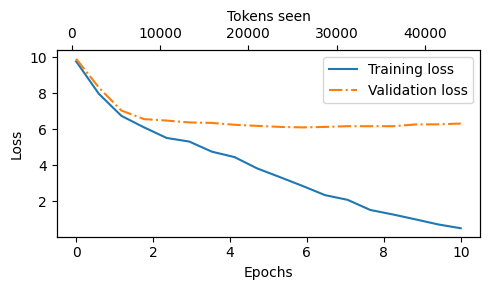

In [338]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_minor_locator(MaxNLocator(integer=True)) # only show integer labels on x-axis

    # Create a second x-axis for tokens seen
    ax2 = ax1.twiny() # Create a second x-axis that shares the same y-axis
    ax2.plot(tokens_seen, train_losses, alpha=0) # Invisible block for aligning ticks
    ax2.set_xlabel("Tokens seen")

    fig.tight_layout() # Adjust layout to make room
    plt.savefig("loss-plot.pdf")
    plt.show()

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

LECTURE 28 --> TEMPERATURE SCALING

-> AS OF NOW THE GENERATED TOKEN IS SELECTED CORRESPONDING TO THE LARGEST PROBABILITY SCORE AMONG ALL TOKENS IN THE VOCABULARY
-> LEADS TO A LOT OF RANDOMNESS AND DIVERSITY IN THE TEXT

WE WILL LEARN 2 TECHNIQUES TO CONTROL THIS RANDOMNESS (SAMPLING THE NEXT TOKEN FROM A PROBABILITY DISTRIBUTION)

2 TECHNIQUES USED IN CONJUNCTION TO EACH OTHER

TEMPERATURE SCALING AND TOP-K SAMPLING

THEORY BEHIND TEMPERATURE SCALING --> REPLACE ARGMAX (MAX VALUE FROM THE SOFTMAX VECTOR) WITH A PROBABILITY DISTRIBUTION --> MULTINOMINAL PROBABILITY DISTRIBUTION SAMPLES NEXT TOKEN ACCORDING TO PROBABILITY SCORE

TEMPERATURE: FANCY TERM FOR DIVIDING THE LOGITS BY NUMBER GREATER THAN 0

SCALED LOGITS = LOGITS / TEMPERATURE --> SMALL (SHARPER DISTRIBUTION) LARGE --> (FLATTENED DISTRIBUTION [MORE VARIETY BUT ALSO MORE NONSENSE])



In [312]:
# EXAMPLE
vocab = {
    "closer": 0,
    "every": 1,
    "effort": 2,
    "forward": 3,
    "inches": 4,
    "moves": 5,
    "pizza": 6,
    "toward": 7,
    "you": 8
}

inverse_vocab = {v: k for k, v in vocab.items()}

print(inverse_vocab)

{0: 'closer', 1: 'every', 2: 'effort', 3: 'forward', 4: 'inches', 5: 'moves', 6: 'pizza', 7: 'toward', 8: 'you'}


In [313]:
next_token_logits = torch.tensor([
    4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79
])

In [334]:
probas = torch.softmax(next_token_logits, dim=0)
print(probas)
next_token_id = torch.argmax(probas).item()
print(next_token_id)
print(inverse_vocab[next_token_id])


next_token_logits2 = next_token_logits / 0.1
probas2 = torch.softmax(next_token_logits2, dim=0)
print(probas2)


next_token_logits3 = next_token_logits / 5
probas3 = torch.softmax(next_token_logits3, dim=0)
print(probas3)

tensor([    0.0609,     0.0016,     0.0001,     0.5721,     0.0034,     0.0001,
            0.0001,     0.3576,     0.0040])
3
forward
tensor([    0.0000,     0.0000,     0.0000,     0.9910,     0.0000,     0.0000,
            0.0000,     0.0090,     0.0000])
tensor([0.1546, 0.0750, 0.0429, 0.2421, 0.0869, 0.0454, 0.0430, 0.2203, 0.0898])


In [335]:
# replace argmax with multinominal function
torch.manual_seed(123)
next_token_id = torch.multinomial(probas, num_samples=1).item()
print(inverse_vocab[next_token_id])

toward


In [336]:
def print_sample_tokens(probas):
    torch.manual_seed(123)
    sample = [torch.multinomial(probas, num_samples=1).item() for i in range(1_000)] # ensures that we do not sample the same token each time but give other tokens the chance to be sampled
    sample_ids = torch.bincount(torch.tensor(sample))
    for i, freq in enumerate(sample_ids):
        print(f"{freq} x {inverse_vocab[i]}")

print_sample_tokens(probas)

71 x closer
2 x every
0 x effort
544 x forward
2 x inches
1 x moves
0 x pizza
376 x toward
4 x you


In [329]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim=0)

# Temperature values
temperatures = [1, 0.1, 5] # Original, higher confidence, and lower confidence

# Calculate scaled probabilities
scaled_probas = [softmax_with_temperature(next_token_logits, T) for T in temperatures]

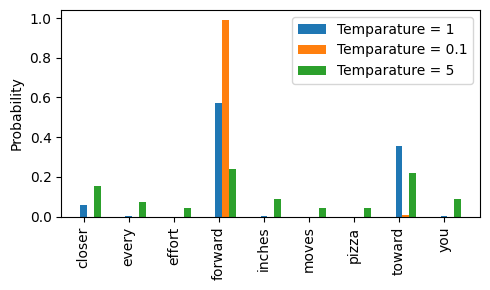

In [330]:
# Plotting
x = torch.arange(len(vocab))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(5, 3))
for i, T in enumerate(temperatures):
    rects = ax.bar(x + i * bar_width, scaled_probas[i], bar_width, label=f'Temparature = {T}')

ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(), rotation=90)
ax.legend()

plt.tight_layout()
plt.savefig("temperature-plot.pdf")
plt.show()